In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.font_manager as fm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [214]:
company_info = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final.csv',encoding='cp949')

In [215]:
company_info

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,국가명,직원수,폐업여부,산업코드 대분류,구글 검색량,설립일자(day)
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,0,0,1966-04-19 00:00:00,1,0,43.0,0,도매 및 소매업,67500.0,20650
1,2078132193,엠피아이,2,1,1,0,0,0,15,0,0,0,1991-08-06 00:00:00,1,0,35.0,0,제조업,2890000.0,11410
2,1318167565,도영운수,2,1,1,0,0,0,49,0,0,0,2001-10-30 00:00:00,1,0,149.0,0,운수 및 창고업,484.0,7672
3,5048128251,중원산업,2,1,1,0,0,0,30,0,0,0,1999-01-12 00:00:00,1,0,75.0,0,제조업,82300.0,8694
4,1098164260,카타나골프,2,1,1,0,0,0,46,0,0,0,2000-05-31 00:00:00,1,0,3.0,0,도매 및 소매업,310.0,8189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,2,1,2,0,0,0,10,0,0,1,2018-01-26 00:00:00,1,0,0.0,1,제조업,8.0,1740
35717,8018501578,우진푸드중부지점,2,1,2,0,0,0,10,0,0,1,2020-07-27 00:00:00,1,0,22.0,1,제조업,19.0,827
35718,4118523419,윤월드푸드코리아다크써클브로스,2,1,2,0,0,0,56,0,0,1,2019-09-26 00:00:00,1,0,0.0,1,숙박 및 음식점업,0.0,1132
35719,1738102533,기린테크,2,1,1,0,0,0,58,0,0,0,2021-10-25 00:00:00,1,0,0.0,1,정보통신업,119000.0,372


# Feature Engineering

In [216]:
df = company_info.drop(columns=['사업자등록번호','기업명','설립일자','산업코드1','공기업구분'])

In [217]:
df.columns

Index(['개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부', '상장코드', '공공기관유형', '중견기업보호여부',
       '본점기업코드', '설립구분', '국가명', '직원수', '폐업여부', '산업코드 대분류', '구글 검색량',
       '설립일자(day)'],
      dtype='object')

## 스케일링 인코딩 진행

In [2]:
from sklearn.preprocessing import StandardScaler # 스케일링 라이브러리
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [219]:
company_info

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,중견기업보호여부,본점기업코드,설립일자,설립구분,국가명,직원수,폐업여부,산업코드 대분류,구글 검색량,설립일자(day)
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,0,0,1966-04-19 00:00:00,1,0,43.0,0,도매 및 소매업,67500.0,20650
1,2078132193,엠피아이,2,1,1,0,0,0,15,0,0,0,1991-08-06 00:00:00,1,0,35.0,0,제조업,2890000.0,11410
2,1318167565,도영운수,2,1,1,0,0,0,49,0,0,0,2001-10-30 00:00:00,1,0,149.0,0,운수 및 창고업,484.0,7672
3,5048128251,중원산업,2,1,1,0,0,0,30,0,0,0,1999-01-12 00:00:00,1,0,75.0,0,제조업,82300.0,8694
4,1098164260,카타나골프,2,1,1,0,0,0,46,0,0,0,2000-05-31 00:00:00,1,0,3.0,0,도매 및 소매업,310.0,8189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,4808501629,게방식당팩토리,2,1,2,0,0,0,10,0,0,1,2018-01-26 00:00:00,1,0,0.0,1,제조업,8.0,1740
35717,8018501578,우진푸드중부지점,2,1,2,0,0,0,10,0,0,1,2020-07-27 00:00:00,1,0,22.0,1,제조업,19.0,827
35718,4118523419,윤월드푸드코리아다크써클브로스,2,1,2,0,0,0,56,0,0,1,2019-09-26 00:00:00,1,0,0.0,1,숙박 및 음식점업,0.0,1132
35719,1738102533,기린테크,2,1,1,0,0,0,58,0,0,0,2021-10-25 00:00:00,1,0,0.0,1,정보통신업,119000.0,372


In [220]:
num_attribss = df[['직원수','설립일자(day)','구글 검색량']]
cat_1hot_attribs = df[['산업코드 대분류']]
cat_ord_attribs = df[['상장코드','벤처기업여부','공공기관유형', '중견기업보호여부','국가명','국외투자법인여부','개인법인구분','본점지점구분','본점기업코드','설립구분']]
y = company_info[['폐업여부']]

cat_all = df[['산업코드 대분류','상장코드','벤처기업여부','공공기관유형', '중견기업보호여부','국가명','국외투자법인여부','본점지점구분','본점기업코드','설립구분']]
# 변수별 타입 나누기

In [221]:
cat_all.dtypes

산업코드 대분류    object
상장코드         int64
벤처기업여부       int64
공공기관유형       int64
중견기업보호여부     int64
국가명          int64
국외투자법인여부     int64
본점지점구분       int64
본점기업코드       int64
설립구분         int64
dtype: object

## 스케일링

### StandardScaler

In [222]:
# 수치형 변수 스케일링
sta_scaler = StandardScaler()
sta_X_scale = sta_scaler.fit_transform(num_attribss)
sta_X_scale = pd.DataFrame(sta_X_scale, columns=num_attribss.columns)
sta_X_scale  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량
0,-0.071824,3.515949,-0.045666
1,-0.123865,1.242839,0.033135
2,0.617721,0.323263,-0.047537
3,0.136341,0.574683,-0.045253
4,-0.332029,0.450449,-0.047542
...,...,...,...
35716,-0.351545,-1.136054,-0.047550
35717,-0.208432,-1.360659,-0.047550
35718,-0.351545,-1.285626,-0.047550
35719,-0.351545,-1.472592,-0.044228


# MinMaxScaler

In [223]:
MM_scaler = MinMaxScaler()
MM_X_scale = MM_scaler.fit_transform(num_attribss)
MM_X_scale = pd.DataFrame(MM_X_scale, columns=num_attribss.columns)
MM_X_scale  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량
0,0.002636,0.414897,1.917614e-05
1,0.002146,0.228227,8.210227e-04
2,0.009135,0.152710,1.375000e-07
3,0.004598,0.173357,2.338068e-05
4,0.000184,0.163155,8.806818e-08
...,...,...,...
35716,0.000000,0.032869,2.272727e-09
35717,0.001349,0.014425,5.397727e-09
35718,0.000000,0.020586,0.000000e+00
35719,0.000000,0.005232,3.380682e-05


## 원핫인코딩

In [224]:
# 원핫인코딩 함수 적용
hot1_encoder = OneHotEncoder(sparse=False,drop='if_binary')
X_1hot = hot1_encoder.fit_transform(cat_1hot_attribs)
X_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [225]:
X_1hot = pd.DataFrame(X_1hot, columns=hot1_encoder.get_feature_names()) #순서가 없는 카테고리형
# 데이터 프레임화

C:\Users\yoon9\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [226]:
X_1hot

,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,x0_보건업 및 사회복지 서비스업,x0_부동산업,"x0_사업시설 관리, 사업 지원 및 임대 서비스업","x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Oridinal Encoding

In [345]:
ord_encoder = OrdinalEncoder() #순서가 있는 카테고리형
X_ord = ord_encoder.fit_transform(cat_ord_attribs['벤처기업여부'].values.reshape(-1,1))
X_ord = pd.DataFrame(X_ord, columns= ['벤처기업여부'])
X_ord

,벤처기업여부
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
35716,0.0
35717,0.0
35718,0.0
35719,0.0


## Label Encoding

In [228]:
cat_all['산업코드 대분류']

0         도매 및 소매업
1              제조업
2         운수 및 창고업
3              제조업
4         도매 및 소매업
           ...    
35716          제조업
35717          제조업
35718    숙박 및 음식점업
35719        정보통신업
35720          제조업
Name: 산업코드 대분류, Length: 35721, dtype: object

In [229]:
X_label = cat_all.copy()

In [230]:
lab_encoder = LabelEncoder()  #순서가 있는 카테고리형

In [231]:
for name in cat_all.columns:
    X_label[name] = lab_encoder.fit_transform(cat_all[name])

In [346]:
X_label

산업코드 대분류    int32
상장코드        int64
벤처기업여부      int64
공공기관유형      int64
중견기업보호여부    int64
국가명         int64
국외투자법인여부    int64
본점지점구분      int64
본점기업코드      int64
설립구분        int64
dtype: object

In [233]:
X_label_ob = X_label.astype('object')

# Scaler + encoder 데이터 프레임 합치기

In [234]:
df_preprdcessed_sta = pd.concat([sta_X_scale, X_1hot, X_ord], axis = 1)
df_preprdcessed_sta
# Standard Scaler + One Hot + Ordinal

,직원수,설립일자(day),구글 검색량,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,...,"x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체,벤처기업여부
0,-0.071824,3.515949,-0.045666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.123865,1.242839,0.033135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.617721,0.323263,-0.047537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.136341,0.574683,-0.045253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.332029,0.450449,-0.047542,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,-0.351545,-1.136054,-0.047550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35717,-0.208432,-1.360659,-0.047550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35718,-0.351545,-1.285626,-0.047550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,-0.351545,-1.472592,-0.044228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [235]:
df_preprdcessed_MM = pd.concat([MM_X_scale, X_1hot, X_ord], axis = 1)
df_preprdcessed_MM
#Min Max Scaler + One Hot + Ordinal

,직원수,설립일자(day),구글 검색량,x0_건설업,"x0_공공 행정, 국방 및 사회보장 행정",x0_광업,x0_교육 서비스업,x0_금융 및 보험업,"x0_농업,임업 및 어업",x0_도매 및 소매업,...,"x0_수도, 하수 및 폐기물 처리, 원료 재생업",x0_숙박 및 음식점업,"x0_예술, 스포츠 및 여가관련 서비스업",x0_운수 및 창고업,"x0_전기,가스,증기 및 공기 조절 공급업","x0_전문, 과학 및 기술 서비스업",x0_정보통신업,x0_제조업,x0_협회 및 단체,벤처기업여부
0,0.002636,0.414897,1.917614e-05,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002146,0.228227,8.210227e-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.009135,0.152710,1.375000e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004598,0.173357,2.338068e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000184,0.163155,8.806818e-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.000000,0.032869,2.272727e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35717,0.001349,0.014425,5.397727e-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
35718,0.000000,0.020586,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35719,0.000000,0.005232,3.380682e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [236]:
df_preprdcessed_sta_label = pd.concat([sta_X_scale, X_label], axis = 1)
df_preprdcessed_sta_label

# Standard scaler + Label encoding

,직원수,설립일자(day),구글 검색량,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,-0.071824,3.515949,-0.045666,6,0,0,0,0,0,0,0,0,0
1,-0.123865,1.242839,0.033135,17,0,0,0,0,0,0,0,0,0
2,0.617721,0.323263,-0.047537,13,0,0,0,0,0,0,0,0,0
3,0.136341,0.574683,-0.045253,17,0,0,0,0,0,0,0,0,0
4,-0.332029,0.450449,-0.047542,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,-0.351545,-1.136054,-0.047550,17,0,0,0,0,0,0,1,1,0
35717,-0.208432,-1.360659,-0.047550,17,0,0,0,0,0,0,1,1,0
35718,-0.351545,-1.285626,-0.047550,11,0,0,0,0,0,0,1,1,0
35719,-0.351545,-1.472592,-0.044228,16,0,0,0,0,0,0,0,0,0


In [237]:
df_preprdcessed_mm_label = pd.concat([MM_X_scale, X_label], axis = 1)
df_preprdcessed_mm_label

,직원수,설립일자(day),구글 검색량,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,0.002636,0.414897,1.917614e-05,6,0,0,0,0,0,0,0,0,0
1,0.002146,0.228227,8.210227e-04,17,0,0,0,0,0,0,0,0,0
2,0.009135,0.152710,1.375000e-07,13,0,0,0,0,0,0,0,0,0
3,0.004598,0.173357,2.338068e-05,17,0,0,0,0,0,0,0,0,0
4,0.000184,0.163155,8.806818e-08,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.000000,0.032869,2.272727e-09,17,0,0,0,0,0,0,1,1,0
35717,0.001349,0.014425,5.397727e-09,17,0,0,0,0,0,0,1,1,0
35718,0.000000,0.020586,0.000000e+00,11,0,0,0,0,0,0,1,1,0
35719,0.000000,0.005232,3.380682e-05,16,0,0,0,0,0,0,0,0,0


In [238]:
df_preprdcessed_mm_label_ob = pd.concat([MM_X_scale, X_label_ob], axis = 1)
df_preprdcessed_mm_label_ob

,직원수,설립일자(day),구글 검색량,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,본점기업코드,설립구분
0,0.002636,0.414897,1.917614e-05,6,0,0,0,0,0,0,0,0,0
1,0.002146,0.228227,8.210227e-04,17,0,0,0,0,0,0,0,0,0
2,0.009135,0.152710,1.375000e-07,13,0,0,0,0,0,0,0,0,0
3,0.004598,0.173357,2.338068e-05,17,0,0,0,0,0,0,0,0,0
4,0.000184,0.163155,8.806818e-08,6,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35716,0.000000,0.032869,2.272727e-09,17,0,0,0,0,0,0,1,1,0
35717,0.001349,0.014425,5.397727e-09,17,0,0,0,0,0,0,1,1,0
35718,0.000000,0.020586,0.000000e+00,11,0,0,0,0,0,0,1,1,0
35719,0.000000,0.005232,3.380682e-05,16,0,0,0,0,0,0,0,0,0


## 모델 평가 함수

In [22]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
def model_eval(pred, answer):
    print(f'accuracy_score : {accuracy_score(pred,answer)}')
    print(f'recall_score : {recall_score(pred,answer)}')
    print(f'precision_score : {precision_score(pred,answer)}')
    print(f'f1_score : {f1_score(pred,answer)}')
    print(f'coufusion_matrix : ')
    print(confusion_matrix(pred,answer))

# Standard Scaler + One Hot + Ordinal Random Forest

In [241]:
X = df_preprdcessed_sta

In [242]:
X.shape, y.shape

((35721, 23), (35721, 1))

In [243]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((28576, 23), (7145, 23), (28576, 1), (7145, 1))

In [244]:
y.value_counts()

폐업여부
0       28982
1        6739
dtype: int64

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
RFC_sta = RandomForestClassifier(max_depth=10,n_estimators=100)

In [247]:
RFC_sta.fit(X_train,y_train)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13432\1307098183.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_sta.fit(X_train,y_train)


RandomForestClassifier(max_depth=10)

In [248]:
X_train_predicted = RFC_sta.predict(X_train)

In [249]:
X_val_predicted = RFC_sta.predict(X_val)

In [250]:
model_eval(X_train_predicted,y_train)

accuracy_score : 0.9060750279955208
recall_score : 0.9424648577966656
precision_score : 0.5347801892042293
f1_score : 0.6823668639053254
coufusion_matrix : 
[[23009  2508]
 [  176  2883]]


In [251]:
model_eval(X_val_predicted,y_val)

accuracy_score : 0.8920923722883135
recall_score : 0.8914518317503393
precision_score : 0.4873887240356083
f1_score : 0.6302158273381295
coufusion_matrix : 
[[5717  691]
 [  80  657]]


# Minmax Scaler + One Hot + Ordinal Random Forest

In [252]:
X_MM = df_preprdcessed_sta_label

In [253]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [254]:
X_train_MM, X_val_MM, y_train_MM, y_val_MM = train_test_split(X_MM, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_MM.shape, X_val_MM.shape, y_train_MM.shape, y_val_MM.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [255]:
RFC_MM = RandomForestClassifier()

In [256]:
RFC_MM.fit(X_train_MM,y_train_MM)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13432\3340015268.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_MM.fit(X_train_MM,y_train_MM)


RandomForestClassifier()

In [257]:
X_train_predicted_MM = RFC_MM.predict(X_train_MM)

In [258]:
X_val_predicted_MM = RFC_MM.predict(X_val_MM)

In [259]:
model_eval(X_train_predicted_MM,y_train_MM)

accuracy_score : 0.993631019036954
recall_score : 0.9980875884490342
precision_score : 0.9680949731033204
f1_score : 0.9828625235404896
coufusion_matrix : 
[[23175   172]
 [   10  5219]]


In [260]:
model_eval(X_val_predicted_MM,y_val_MM)

accuracy_score : 0.927221833449965
recall_score : 0.8883677298311444
precision_score : 0.7025222551928784
f1_score : 0.7845898922949461
coufusion_matrix : 
[[5678  401]
 [ 119  947]]


MinMax 를 사용하자 성능이 더 향상되었다.

## Standard Scaler + Label encoding Random Forest

In [261]:
X_sl = df_preprdcessed_sta_label

In [262]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [263]:
X_train_sl, X_val_sl, y_train_sl, y_val_sl = train_test_split(X_sl, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_sl.shape, X_val_sl.shape, y_train_sl.shape, y_val_sl.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [264]:
RFC_sl = RandomForestClassifier()

In [265]:
RFC_sl.fit(X_train_sl,y_train_sl)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13432\1300462302.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_sl.fit(X_train_sl,y_train_sl)


RandomForestClassifier()

In [266]:
X_train_predicted_sl = RFC_sl.predict(X_train_sl)

In [267]:
X_val_predicted_sl = RFC_sl.predict(X_val_sl)

In [268]:
model_eval(X_train_predicted_sl,y_train_sl)

accuracy_score : 0.993386058230683
recall_score : 0.9980850248946763
precision_score : 0.9667965127063625
f1_score : 0.9821916517478563
coufusion_matrix : 
[[23175   179]
 [   10  5212]]


In [269]:
model_eval(X_val_predicted_sl,y_val_sl)

accuracy_score : 0.9282015395381386
recall_score : 0.8883720930232558
precision_score : 0.7084569732937686
f1_score : 0.7882789929839042
coufusion_matrix : 
[[5677  393]
 [ 120  955]]


# Minmax scaler + label_Encoding_type

In [270]:
X_mml = df_preprdcessed_mm_label

In [271]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [272]:
X_train_mml, X_val_mml, y_train_mml, y_val_mml = train_test_split(X_mml, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_mml.shape, X_val_mml.shape, y_train_mml.shape, y_val_mml.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [273]:
RFC_mml = RandomForestClassifier()

In [274]:
RFC_mml.fit(X_train_mml,y_train_mml)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13432\1687393012.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_mml.fit(X_train_mml,y_train_mml)


RandomForestClassifier()

In [275]:
X_train_predicted_mml = RFC_mml.predict(X_train_mml)

In [326]:
X_val_predicted_mml = RFC_mml.predict(X_val_mml)

In [327]:
model_eval(X_train_predicted_mml,y_train_mml)

accuracy_score : 0.9826427771556551
recall_score : 0.9903826888399119
precision_score : 0.9168985345946948
f1_score : 0.9522250048160278
coufusion_matrix : 
[[23137   448]
 [   48  4943]]


In [328]:
model_eval(X_val_predicted_mml,y_val_mml)

accuracy_score : 0.90258922323303
recall_score : 0.8214990138067061
precision_score : 0.6179525222551929
f1_score : 0.7053344623200678
coufusion_matrix : 
[[5616  515]
 [ 181  833]]


In [279]:
RFC_mml.feature_importances_

array([0.22483212, 0.29633966, 0.27296239, 0.14906675, 0.00319126,
       0.00740752, 0.00036513, 0.0015048 , 0.00384091, 0.00305161,
       0.01297049, 0.01207182, 0.01239554])

# Minmax scaler + labelEncoding_object

In [329]:
X_mml_ob = df_preprdcessed_mm_label_ob

In [330]:
y

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
35716,1
35717,1
35718,1
35719,1


In [282]:
X_train_mml_ob, X_val_mml_ob, y_train_mml_ob, y_val_mml_ob = train_test_split(X_mml_ob, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train_mml_ob.shape, X_val_mml_ob.shape, y_train_mml_ob.shape, y_val_mml_ob.shape

((28576, 13), (7145, 13), (28576, 1), (7145, 1))

In [331]:
RFC_mml_ob = RandomForestClassifier()

In [332]:
RFC_mml_ob.fit(X_train_mml_ob,y_train_mml_ob)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_13432\1210140904.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_mml_ob.fit(X_train_mml_ob,y_train_mml_ob)


RandomForestClassifier()

In [333]:
X_train_predicted_mml_ob = RFC_mml_ob.predict(X_train_mml_ob)

In [334]:
X_val_predicted_mml_ob = RFC_mml_ob.predict(X_val_mml_ob)

In [335]:
model_eval(X_train_predicted_mml_ob,y_train_mml_ob)

accuracy_score : 0.9827477603583427
recall_score : 0.9890175718849841
precision_score : 0.9187534780189204
f1_score : 0.9525915953457064
coufusion_matrix : 
[[23130   438]
 [   55  4953]]


In [336]:
model_eval(X_val_predicted_mml_ob,y_val_mml_ob)

accuracy_score : 0.9021693491952414
recall_score : 0.8222442899702085
precision_score : 0.6142433234421365
f1_score : 0.7031847133757961
coufusion_matrix : 
[[5618  520]
 [ 179  828]]


In [337]:
RFC_mml.feature_importances_

array([0.22483212, 0.29633966, 0.27296239, 0.14906675, 0.00319126,
       0.00740752, 0.00036513, 0.0015048 , 0.00384091, 0.00305161,
       0.01297049, 0.01207182, 0.01239554])

# 실험 결과 시각화

In [299]:
def plot_f1_acc(pred, answer):
    return accuracy_score(pred,answer) , f1_score(pred,answer)

In [301]:
acc_sta_oo, f1_sta_oo = plot_f1_acc(X_val_predicted,y_val) # sta + oo
acc_mm_oo, f1_mm_oo = plot_f1_acc(X_val_predicted_MM,y_val_MM) # mm + 00
acc_sta_l, f1_sta_l = plot_f1_acc(X_val_predicted_sl,y_val_sl) #sta + l
acc_mm_l, f1_mm_l = plot_f1_acc(X_val_predicted_mml_ob,y_val_mml_ob) #mml + L

In [308]:
acc = [(acc_sta_oo,acc_mm_oo,acc_sta_l,acc_mm_l)]
f1 = [(f1_sta_oo,f1_mm_oo,f1_sta_l,f1_mm_l)]
result_acc = pd.DataFrame(acc,columns=['Standard+Label','MinMax+One-Hot+Ordinal','Standard+One-Hot+Ordinal','MinMax+Label'],index=['accuracy'])
result_acc

,Standard+Label,MinMax+One-Hot+Ordinal,Standard+One-Hot+Ordinal,MinMax+Label
accuracy,0.892092,0.927222,0.928202,0.902449


In [309]:
result_f1 = pd.DataFrame(f1,columns=['Standard+Label','MinMax+One-Hot+Ordinal','Standard+One-Hot+Ordinal','MinMax+Label'],index=['f1 score'])
result_f1

,Standard+Label,MinMax+One-Hot+Ordinal,Standard+One-Hot+Ordinal,MinMax+Label
f1 score,0.630216,0.78459,0.788279,0.703025


In [318]:
result = pd.concat([result_acc,result_f1])
result

,Standard+Label,MinMax+One-Hot+Ordinal,Standard+One-Hot+Ordinal,MinMax+Label
accuracy,0.892092,0.927222,0.928202,0.902449
f1 score,0.630216,0.784590,0.788279,0.703025


C:\Users\yoon9\anaconda3\envs\numble_repo_3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yoon9\anaconda3\envs\numble_repo_3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


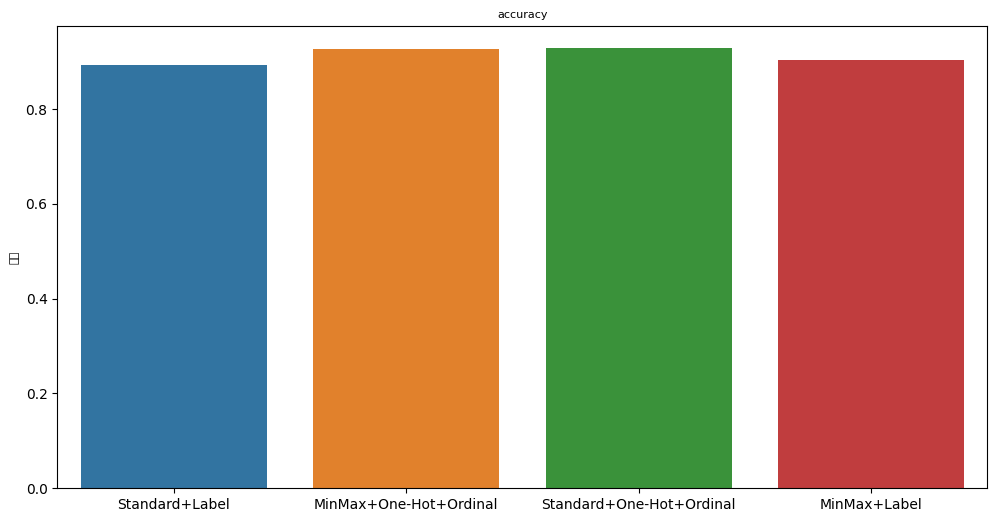

In [343]:
plt.figure(figsize=(12,6))
sns.barplot(result_acc)
plt.title('accuracy', fontsize=8)
plt.ylabel('점수', fontsize=8)
plt.show()

C:\Users\yoon9\anaconda3\envs\numble_repo_3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yoon9\anaconda3\envs\numble_repo_3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


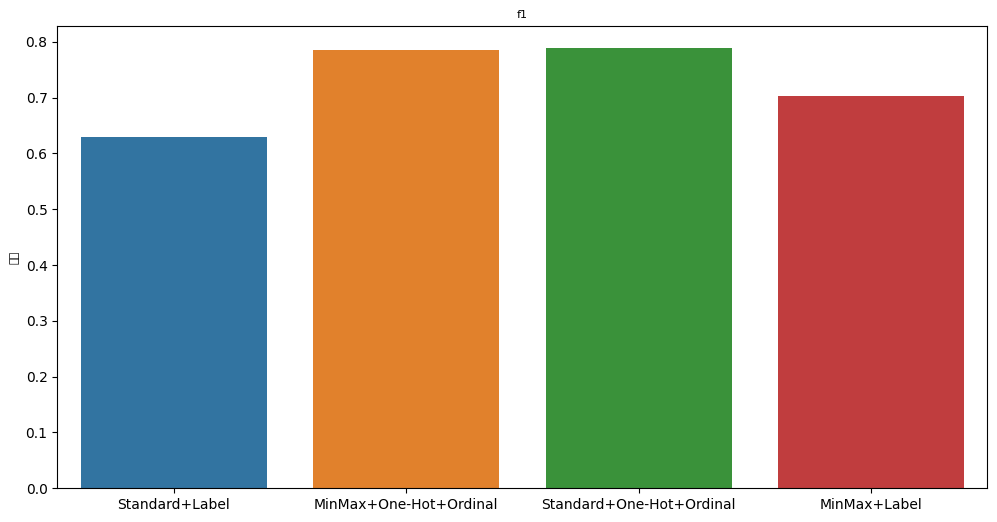

In [338]:
plt.figure(figsize=(12,6))
sns.barplot(result_f1)
plt.title('f1', fontsize=8)
plt.ylabel('점수', fontsize=8)
plt.show()

# Corp 데이터 Test

In [3]:
df_corp = pd.read_csv(r'C:\Users\yoon9\Documents\GitHub\numble_repo\data\company_info_final+corp.csv',encoding='cp949')

In [4]:
corp = df_corp
corp.columns

Index(['사업자등록번호', '기업명', '공기업구분', '개인법인구분', '본점지점구분', '국외투자법인여부', '벤처기업여부',
       '상장코드', '산업코드1', '공공기관유형', '중견기업보호여부', '본점기업코드', '설립일자', '설립구분', '국가명',
       '직원수', '폐업여부', '산업코드 대분류', '구글 검색량', '설립일자(day)', '회사명', 'sum_rlt',
       '휴폐업유무', '재무정보_분기'],
      dtype='object')

In [5]:
corp

,사업자등록번호,기업명,공기업구분,개인법인구분,본점지점구분,국외투자법인여부,벤처기업여부,상장코드,산업코드1,공공기관유형,...,국가명,직원수,폐업여부,산업코드 대분류,구글 검색량,설립일자(day),회사명,sum_rlt,휴폐업유무,재무정보_분기
0,1138111739,한일가스산업,2,1,1,0,0,0,47,0,...,0,43.0,0,도매 및 소매업,67500.0,20650,1138111739_1,1.0,0.0,1
1,1098164260,카타나골프,2,1,1,0,0,0,46,0,...,0,3.0,0,도매 및 소매업,310.0,8189,1098164260_1,5.0,0.0,1
2,1098164260,카타나골프,2,1,1,0,0,0,46,0,...,0,3.0,0,도매 및 소매업,310.0,8189,1098164260_2,6.0,0.0,2
3,1078156099,세풍폴리머,2,1,1,0,0,0,46,0,...,0,36.0,0,도매 및 소매업,115.0,9619,1078156099_1,1.0,0.0,1
4,1078156099,세풍폴리머,2,1,1,0,0,0,46,0,...,0,36.0,0,도매 및 소매업,115.0,9619,1078156099_2,4.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,1198708608,엘에스월드,2,1,1,0,1,0,25,0,...,0,1.0,1,제조업,8480.0,1300,1198708608_2,11.0,1.0,2
14338,1188122814,메카미솔루션,2,1,1,0,0,0,26,0,...,0,1.0,1,제조업,8480.0,1274,1188122814_1,41.0,1.0,1
14339,1068544749,농업회사법인(주)홍지원군포지점,2,1,2,0,0,0,46,0,...,0,0.0,1,도매 및 소매업,8480.0,1243,1068544749_1,5.0,1.0,1
14340,1068544749,농업회사법인(주)홍지원군포지점,2,1,2,0,0,0,46,0,...,0,0.0,1,도매 및 소매업,8480.0,1243,1068544749_2,16.0,1.0,2


In [11]:
num_attribss_corp = corp[['직원수', '설립일자(day)', '구글 검색량','sum_rlt']]
y_corp = corp[['폐업여부']]

cat_all_corp = corp[['산업코드 대분류', '상장코드', '벤처기업여부', '공공기관유형', '중견기업보호여부', '국가명', '국외투자법인여부', '본점지점구분', '설립구분']]
# 변수별 타입 나누기

In [12]:
# 수치형 변수 스케일링
sta_scaler_corp = StandardScaler()
sta_X_scale_corp = sta_scaler_corp.fit_transform(num_attribss_corp)
sta_X_scale_corp = pd.DataFrame(sta_X_scale_corp, columns=num_attribss_corp.columns)
sta_X_scale_corp  # 스케일링 데이터 프레임화

,직원수,설립일자(day),구글 검색량,sum_rlt
0,-0.194360,2.953956,-0.052631,-0.691818
1,-0.420968,0.025309,-0.054413,-0.277484
2,-0.420968,0.025309,-0.054413,-0.173901
3,-0.234016,0.361394,-0.054418,-0.691818
4,-0.234016,0.361394,-0.054418,-0.381068
...,...,...,...,...
14337,-0.432299,-1.593779,-0.054197,0.344017
14338,-0.432299,-1.599889,-0.054197,3.451523
14339,-0.437964,-1.607175,-0.054197,-0.277484
14340,-0.437964,-1.607175,-0.054197,0.861935


In [8]:
X_label_corp = cat_all_corp.copy()
lab_encoder_corp = LabelEncoder()  #순서가 있는 카테고리형
for name in cat_all_corp.columns:
    X_label_corp[name] = lab_encoder_corp.fit_transform(cat_all_corp[name])
X_label_corp

,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,설립구분
0,5,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
14337,16,0,1,0,0,0,0,0,0
14338,16,0,0,0,0,0,0,0,0
14339,5,0,0,0,0,0,0,1,0
14340,5,0,0,0,0,0,0,1,0


In [9]:
df_preprdcessed_corp = pd.concat([sta_X_scale_corp, X_label_corp], axis = 1)
df_preprdcessed_corp

,직원수,설립일자(day),구글 검색량,sum_rlt,산업코드 대분류,상장코드,벤처기업여부,공공기관유형,중견기업보호여부,국가명,국외투자법인여부,본점지점구분,설립구분
0,-0.194360,2.953956,-0.052631,-0.691818,5,0,0,0,0,0,0,0,0
1,-0.420968,0.025309,-0.054413,-0.277484,5,0,0,0,0,0,0,0,0
2,-0.420968,0.025309,-0.054413,-0.173901,5,0,0,0,0,0,0,0,0
3,-0.234016,0.361394,-0.054418,-0.691818,5,0,0,0,0,0,0,0,0
4,-0.234016,0.361394,-0.054418,-0.381068,5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14337,-0.432299,-1.593779,-0.054197,0.344017,16,0,1,0,0,0,0,0,0
14338,-0.432299,-1.599889,-0.054197,3.451523,16,0,0,0,0,0,0,0,0
14339,-0.437964,-1.607175,-0.054197,-0.277484,5,0,0,0,0,0,0,1,0
14340,-0.437964,-1.607175,-0.054197,0.861935,5,0,0,0,0,0,0,1,0


In [14]:

X_train_corp, X_val_corp, y_train_corp, y_val_corp = train_test_split(df_preprdcessed_corp, y_corp, test_size=0.2, shuffle=True, stratify=y_corp, random_state=42)
X_train_corp.shape, X_val_corp.shape, y_train_corp.shape, y_val_corp.shape

((11473, 13), (2869, 13), (11473, 1), (2869, 1))

In [15]:
y_corp

,폐업여부
0,0
1,0
2,0
3,0
4,0
...,...
14337,1
14338,1
14339,1
14340,1


In [16]:
RFC_corp = RandomForestClassifier()

In [17]:
RFC_corp.fit(X_train_corp,y_train_corp)

C:\Users\yoon9\AppData\Local\Temp\ipykernel_17424\1102302271.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_corp.fit(X_train_corp,y_train_corp)


RandomForestClassifier()

In [18]:
X_train_predicted_corp = RFC_corp.predict(X_train_corp)

In [19]:
X_val_predicted_corp = RFC_corp.predict(X_val_corp)

In [24]:
model_eval(X_train_predicted_corp,y_train_corp)

accuracy_score : 0.9999128388390134
recall_score : 1.0
precision_score : 0.9987951807228915
f1_score : 0.9993972272453284
coufusion_matrix : 
[[10643     1]
 [    0   829]]


In [25]:
model_eval(X_val_predicted_corp,y_val_corp)

accuracy_score : 0.9766469153014988
recall_score : 0.9490445859872612
precision_score : 0.7163461538461539
f1_score : 0.8164383561643836
coufusion_matrix : 
[[2653   59]
 [   8  149]]


In [ ]:
RFC_corp.feature_importances_

In [ ]:
plt.figure(figsize= (10,8))  # 피쳐의 중요도, 가중치 시각화
sns.barplot(y = X_train_corp.columns, x =RFC_corp.feature_importances_)
plt.show()

In [ ]:
df_sum_rlf_std =  df_corp.groupby('기업명')['sum_rlt'].std()

In [ ]:
df_sum_rlf_std = pd.DataFrame(df_sum_rlf_std)

In [ ]:
df_sum_rlf_std